# Airbnb 2017 Data for Boston and Seattle 

## Business Understanding

Airbnb, Inc., based in San Francisco, California, operates an online marketplace focused on short-term homestays and experiences. The company acts as a broker and charges a commission from each booking.

We have Airbnb data for 2017 for Boston and Seattle cities. Data can be found at "http://insideairbnb.com/get-the-data/" . Data gives us information about properties listings,avaliablity calander and people's reviews for the properties.

I will be trying to find answers of questions using Airbnb 2017 data:

#### Q1 What is the best time to Visit Seattle and Boston? How much price spikes on average ?

#### Q2 Is there a general upward trend of new Airbnb listings for Boston and Seattle ?

#### Q3 Is there a general upward trend of total Airbnb visitors to Boston and Seattle ?





## Data Understanding

In [1]:
## Importing Python Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)


In [2]:
## Reading Boston City related data

Boston_Listings = pd.read_csv("C:\\Users\\A04248\\Desktop\\Boston\\listings.csv")
Boston_Calender = pd.read_csv("C:\\Users\\A04248\\Desktop\\Boston\\calendar.csv")
Boston_Reviews =  pd.read_csv("C:\\Users\\A04248\\Desktop\\Boston\\reviews.csv")


### Boston Property Listing on Airbnb

In [3]:
Boston_Listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1804,10118716,https://www.airbnb.com/rooms/10118716,20160906204935,2016-09-07,Furnished Luxury 2BR at West-End,This beautifully furnished apartment is comple...,B653/908,This beautifully furnished apartment is comple...,none,This building is located in the center of it a...,NaN,The building is located in the center of all o...,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/db90b079-d...,https://a2.muscache.com/im/pictures/db90b079-d...,https://a2.muscache.com/im/pictures/db90b079-d...,https://a2.muscache.com/im/pictures/db90b079-d...,30283594,https://www.airbnb.com/users/show/30283594,Kara,2015-03-30,US,NaN,within a few hours,98%,55%,f,https://a2.muscache.com/im/users/30283594/prof...,https://a2.muscache.com/im/users/30283594/prof...,Fenway/Kenmore,749,749,"['email', 'phone', 'reviews', 'jumio']",t,t,"Emerson Place, Boston, MA 02114, United States",West End,West End,NaN,Boston,MA,02114,Boston,"Boston, MA",US,United States,42.365475,-71.068916,t,Apartment,Entire home/apt,5,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$199.00,NaN,NaN,NaN,$100.00,1,$0.00,10,1125,today,NaN,29,59,89,179,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,strict,f,f,136,NaN
1005,3289921,https://www.airbnb.com/rooms/3289921,20160906204935,2016-09-07,South End Studio with Sleeping Loft,"This cozy apartment, located on Massachusetts ...",This renovated studio has 14 foot ceilings wit...,"This cozy apartment, located on Massachusetts ...",none,The South End is the perfect location with the...,While the apartment is capable of sleeping 4 (...,The apartment is across the street from the 1 ...,Guests will have access to a set of keys and t...,I will not be in the apartment while you are t...,There is no smoking and no pets allowed in the...,https://a2.muscache.com/im/pictures/48641368/e...,https://a2.muscache.com/im/pictures/48641368/e...,https://a2.muscache.com/im/pictures/48641368/e...,https://a2.muscache.com/im/pictures/48641368/e...,2212661,https://www.airbnb.com/users/show/2212661,Lauren,2012-04-24,"Boston, Massachusetts, United States","I'm originally from Long Island, NY and have b...",within an hour,100%,0%,f,https://a1.muscache.com/im/users/2212661/profi...,https://a1.muscache.com/im/users/2212661/profi...,South End,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Massachusetts Avenue, Boston, MA 02118, United...",South End,South End,NaN,Boston,MA,02118,Boston,"Boston, MA",US,United States,42.335193,-71.074951,t,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""A

### Boston Airbnb Availability Calender 2017

In [4]:
Boston_Calender.sample(5)

,listing_id,date,available,price
1103294,8291550,2017-06-22,f,NaN
371249,7645862,2017-05-07,t,$239.00
134094,10749312,2017-03-28,t,$199.00
143747,6291807,2016-11-07,f,NaN
645410,13830152,2017-03-31,t,$65.00


### Boston Airbnb Visitors Review 

In [5]:
Boston_Reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
68032,1038465,47413979,2015-09-18,33556294,Monique,Very friendly! Would stay again.
18570,1881298,14904807,2014-06-29,10875903,Kali,Since we've reviewed this twice we have nothin...
37734,1141888,5964444,2013-07-24,6320725,Marcia,Katie and Brian made us feel very welcome duri...
13170,4287348,48719413,2015-09-28,31543995,Michael,Awesome stay in Boston for the Financial Plann...
15747,14572515,97751479,2016-08-28,36746352,Joe,He was a great host


In [6]:
## Printing the Shape of Boston related data

print('Boston_Listings Shape', Boston_Listings.shape,'\n')
print('Boston_Calender Shape', Boston_Calender.shape,'\n')
print('Boston_Reviews Shape',  Boston_Reviews.shape,'\n')



Boston_Listings Shape (3585, 95) 

Boston_Calender Shape (1308890, 4) 

Boston_Reviews Shape (68275, 6) 



In [7]:
## Reading Seattle City related data

Seattle_Listings = pd.read_csv("C:\\Users\\A04248\\Desktop\\Seattle\\listings.csv")
Seattle_Calender = pd.read_csv("C:\\Users\\A04248\\Desktop\\Seattle\\calendar.csv")
Seattle_Reviews = pd.read_csv("C:\\Users\\A04248\\Desktop\\Seattle\\reviews.csv")


### Seattle Property Listing on Airbnb

In [8]:
Seattle_Listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2182,6546748,https://www.airbnb.com/rooms/6546748,20160104002432,2016-01-04,Lake Washington Waterfront Home,The Hammer Manor is a beautiful Lake Washingto...,Luxury three bedroom three bath home with spec...,The Hammer Manor is a beautiful Lake Washingto...,none,The Hammer Manor is located the center of Prit...,NaN,Only 20 minutes away from downtown Seattle. Cl...,https://a1.muscache.com/ac/pictures/82393750/f...,https://a1.muscache.com/im/pictures/82393750/f...,https://a1.muscache.com/ac/pictures/82393750/f...,https://a1.muscache.com/ac/pictures/82393750/f...,29934463,https://www.airbnb.com/users/show/29934463,Roger W,2015-03-24,"Seattle, Washington, United States",I was born in Hollywood and grew up in Souther...,within a day,100%,100%,f,https://a1.muscache.com/ac/users/29934463/prof...,https://a1.muscache.com/ac/users/29934463/prof...,NaN,2.0,2.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,f,"Island Drive South, Seattle, WA 98118, United ...",NaN,Dunlap,Rainier Valley,Seattle,WA,98118,Seattle,"Seattle, WA",US,United States,47.524565,-122.260919,t,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$295.00,"$2,500.00","$9,000.00",NaN,$250.00,6,$50.00,2,1125,today,t,13,43,73,345,2016-01-04,7,2015-06-07,2015-12-01,100.0,9.0,9.0,10.0,9.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,0.99
2028,3543247,https://www.airbnb.com/rooms/3543247,20160104002432,2016-01-04,Spa retreat in vibrant Greenwood,Enjoy the experience of this luxurious spa re...,"New, comfortable, filled with high end finishe...",Enjoy the experience of this luxurious spa re...,none,Greenwood is a very walkable neighborhood with...,We live on site in the main portion of the hou...,Seattle boasts an excellent public transit sys...,https://a0.muscache.com/ac/pictures/54557305/3...,https://a0.muscache.com/im/pictures/54557305/3...,https://a0.muscache.com/ac/pictures/54557305/3...,https://a0.muscache.com/ac/pictures/54557305/3...,17834927,https://www.airbnb.com/users/show/17834927,Jeffrey,2014-07-08,"Seattle, Washington, United States",My wife Ellen and I moved to Seattle from Minn...,within an hour,100%,100%,t,https://a0.muscache.com/ac/users/17834927/prof...,https://a0.muscache.com/ac/users/17834927/prof...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"1st Avenue Northwest, Seattle, WA 98117, Unite...",NaN,Greenwood,Other neighborhoods,Seattle,WA,98117,Seattle,"Seattle, WA",US,United States,47.695853,-122.359356,t,House,Entire home/apt,4,1.0,1.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$160.00,"$1,00

### Seattle Airbnb Availability Calender 2017

In [9]:
Seattle_Calender.sample(5)

,listing_id,date,available,price
268232,7302675,2016-11-21,t,$75.00
758375,613151,2016-09-30,t,$179.00
540202,7965184,2016-01-06,t,$135.00
362030,785830,2016-11-14,f,NaN
986796,338091,2016-07-23,t,$300.00


### Seattle Airbnb Visitors Review 

In [10]:
Seattle_Reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
74789,47491,23016067,2014-11-20,2091238,Milo,BB was very nice and has set up her home for c...
8059,5299060,33704227,2015-05-31,32783820,Julia,The place was great and Dan was wonderful and ...
29019,447523,4088017,2013-04-08,5703267,Tamra,It was clean and quiet with lots of cool maps ...
61442,5682,46505034,2015-09-11,41330264,Craig,Great location and a great host.
6877,699596,30696803,2015-04-26,30025312,Juliette,We had a great experience staying at Megan and...


In [11]:
## Printing the Shape of Seattle related data

print('Seattle_Listings Shape', Seattle_Listings.shape)
print('Seattle_Calender Shape', Seattle_Calender.shape)
print('Seattle_Reviews Shape',  Seattle_Reviews.shape)


Seattle_Listings Shape (3818, 92)
Seattle_Calender Shape (1393570, 4)
Seattle_Reviews Shape (84849, 6)


## Evaluation

### Q1 What is the best time to Visit  Boston  and Seattle ? How much price spikes on average ?

### Boston Data

In [12]:
## Calender Date Range for Boston
## So we have 1 Full year Data

print('Boston Calender Starting Date', Boston_Calender['date'].min())
print('Boston Calender Ending Date',   Boston_Calender['date'].max())

Boston Calender Starting Date 2016-09-06
Boston Calender Ending Date 2017-09-05


In [13]:
# Column 'price' has around 50% null values

Boston_Calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [14]:
#Dropping the rows where price has Nan values. Since nan values are around 50%, amputing them may introduce bias

Boston_Calender = Boston_Calender.dropna(subset = ['price'],how = 'any')
Boston_Calender.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [15]:
# Removing $ and , from Price column's values

Boston_Calender['price'] = Boston_Calender['price'].str.replace('$','').str.replace(',','')


In [16]:
#Changing datatype for date column from object to datetime so that we can perform datetime operation
#Changing datatype for price column from object to float so that we can perform mathematical operation


Boston_Calender['date'] = pd.to_datetime(Boston_Calender['date'])
Boston_Calender['price'] = Boston_Calender['price'].astype(float)


<AxesSubplot:ylabel='price'>

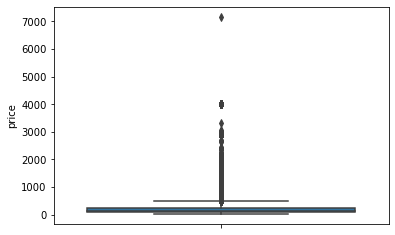

In [17]:
#Price column can have outliers. Checking for outliers through Boxplot

sns.boxplot(y = Boston_Calender['price'])

In [18]:

def Outlier_Treatment(data):
    '''Function for treating the outliers in a data. We will get the Pandas Series as input and will return treated Pandas Series. 
    Args:
         Pandas Series  
    Returns:
        Pandas Series
    '''
    
    Q1 = np.percentile(data,25)
    Q3= np.percentile(data,75) 
    IQR = Q3-Q1
    
    Upper_IQR_bound = (Q3)+(1.5*IQR) 
    Lower_IQR_bound = (Q1)-(1.5*IQR)
    
    data = np.where(data>Upper_IQR_bound,Upper_IQR_bound,data) 
    data = np.where(data<Lower_IQR_bound,Lower_IQR_bound,data)
    
    return data

<AxesSubplot:ylabel='price'>

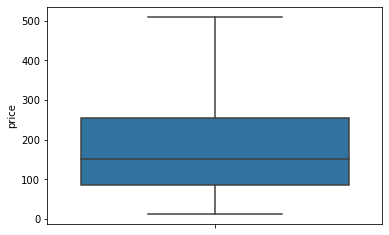

In [19]:
## Doing the outlier treatment for column price through function Outlier_Treatment(data). 
## Will plot boxplot to confirm there are no more outliers.

Boston_Calender['price'] = Outlier_Treatment(Boston_Calender['price'])
sns.boxplot(y = Boston_Calender['price'])

In [20]:
Boston_Calender['price'].describe()

count    643037.000000
mean        189.031208
std         126.205048
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max         510.000000
Name: price, dtype: float64

In [21]:
## Adding a new column 'Month' and Week as we are check what is best month for visting Boston

Boston_Calender['Month'] = Boston_Calender['date'].dt.month_name()
Boston_Calender['Week_Number'] = Boston_Calender['date'].dt.isocalendar().week
Boston_Calender = Boston_Calender.sort_values(by = ['Week_Number']).reset_index()
Boston_Calender

,index,listing_id,date,available,price,Month,Week_Number
0,1056191,57156,2017-01-02,t,95.0,January,1
1,922575,11760822,2017-01-02,t,130.0,January,1
2,862741,8428314,2017-01-02,t,199.0,January,1
3,1227737,14251839,2017-01-06,t,99.0,January,1
4,1227738,14251839,2017-01-05,t,79.0,January,1
...,...,...,...,...,...,...,...
643032,64115,4149974,2016-12-31,t,103.0,December,52
643033,64114,4149974,2017-01-01,t,103.0,January,52
643034,63757,3730447,2017-01-01,t,180.0,January,52
643035,173918,10328539,2016-12-30,t,100.0,December,52


<AxesSubplot:xlabel='Month'>

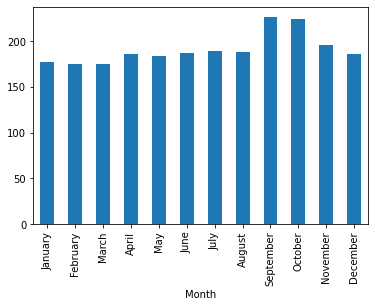

In [22]:
## Boston Bar Graph for prices for different months

Boston_Calender.groupby(['Month'],sort = False)['price'].mean().plot(kind = 'bar')

#### Bars are higher from month from Sept to Nov. So that should be the best season to visit Boston. 

### Seattle Data 

In [23]:
## Calender Date Range for Seattle
## So we have 1 Full year Data

print('Seattle Calender Starting Date', Seattle_Calender['date'].min())
print('Seattle Calender Ending Date',   Seattle_Calender['date'].max())

Seattle Calender Starting Date 2016-01-04
Seattle Calender Ending Date 2017-01-02


In [24]:
# Column 'price' has around 25% null values

Seattle_Calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [25]:
#Dropping the rows where price has Nan values. 

Seattle_Calender = Seattle_Calender.dropna(subset = ['price'],how = 'any')
Seattle_Calender.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [26]:
# Removing $ and , from Price column's values

Seattle_Calender['price'] = Seattle_Calender['price'].str.replace('$','').str.replace(',','')

In [27]:
#Changing datatype for date column from object to datetime so that we can perform datetime operation
#Changing datatype for price column from object to float so that we can perform mathematical operation


Seattle_Calender['date'] = pd.to_datetime(Seattle_Calender['date'])
Seattle_Calender['price'] = Seattle_Calender['price'].astype(float)


<AxesSubplot:ylabel='price'>

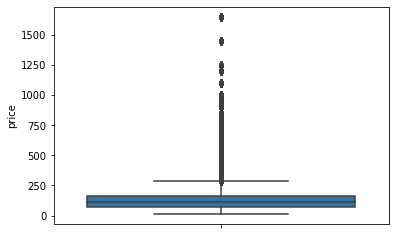

In [28]:
#Price column can have outliers. Checking for outliers through Boxplot

sns.boxplot(y = Seattle_Calender['price'])



<AxesSubplot:ylabel='price'>

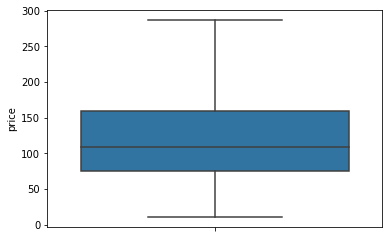

In [29]:
## Doing the outlier treatment for column price through function Outlier_Treatment(data). 
## Will plot boxplot to confirm there are no more outliers.

Seattle_Calender['price'] = Outlier_Treatment(Seattle_Calender['price'])
sns.boxplot(y = Seattle_Calender['price'])


In [30]:
Seattle_Calender['price'].describe()

count    934542.000000
mean        128.110183
std          70.429741
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max         287.500000
Name: price, dtype: float64

In [31]:
## Adding a new column 'Month' and Week as we are check what is best month for visting Seattle

Seattle_Calender['Month'] = Seattle_Calender['date'].dt.month_name()
Seattle_Calender['Week_Number'] = Seattle_Calender['date'].dt.isocalendar().week
Seattle_Calender = Seattle_Calender.sort_values(by = ['Week_Number']).reset_index()
Seattle_Calender

,index,listing_id,date,available,price,Month,Week_Number
0,0,241032,2016-01-04,t,85.0,January,1
1,25185,10234558,2016-01-04,t,50.0,January,1
2,25184,7618605,2017-01-02,t,175.0,January,1
3,633639,353347,2017-01-02,t,200.0,January,1
4,633640,838764,2016-01-04,t,240.0,January,1
...,...,...,...,...,...,...,...
934537,769053,6416765,2017-01-01,t,149.0,January,52
934538,769412,5056580,2016-12-26,t,99.0,December,52
934539,769413,5056580,2016-12-27,t,99.0,December,52
934540,767957,10020221,2016-12-31,t,55.0,December,52


<AxesSubplot:xlabel='Month'>

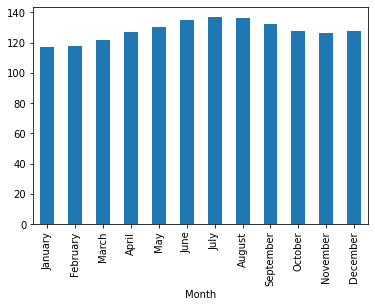

In [32]:
## Seattle Bar Graph for prices for different months

Seattle_Calender.groupby(['Month'],sort = False)['price'].mean().plot(kind = 'bar')

#### Bars are higher from month from June to Sept. So that should be the best season to visit Seattle. 

190.84372915279496 226.26438708904726


<AxesSubplot:>

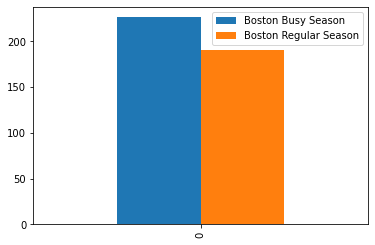

In [36]:
Boston_Avg_Price = df['Boston'].mean()
Boston_Max_Price = df['Boston'].max()
print(Boston_Avg_Price,Boston_Max_Price)

Boston_Season_Diff = pd.DataFrame({'Boston Busy Season':[Boston_Max_Price],'Boston Regular Season':[Boston_Avg_Price]})
Boston_Season_Diff.plot(kind = 'bar')

#### Prices spike around 15% for busy season as compared to regular season in Boston

128.0078318169773 136.95017649753441


<AxesSubplot:>

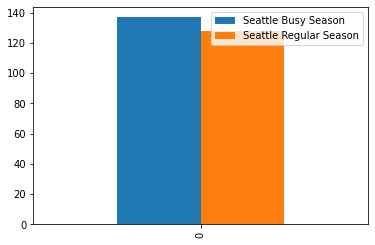

In [38]:
Seattle_Avg_Price = df['Seattle'].mean()
Seattle_Max_Price = df['Seattle'].max()

print(Seattle_Avg_Price,Seattle_Max_Price)

Seattle_Season_Diff = pd.DataFrame({'Seattle Busy Season':[Seattle_Max_Price],'Seattle Regular Season':[Seattle_Avg_Price]})
Seattle_Season_Diff.plot(kind = 'bar')

#### Prices spike around 8-9% for busy season as compared to regular season in Seattle

### Q2 Is there a general upward trend of new Airbnb listings for Boston and Seattle ?


In [39]:
Boston_Listings['host_since'].info()
Boston_Listings['host_since'] = pd.to_datetime(Boston_Listings['host_since'])
Boston_Listings['Hosting_Since_Year'] = Boston_Listings['host_since'].dt.year


<class 'pandas.core.series.Series'>
RangeIndex: 3585 entries, 0 to 3584
Series name: host_since
Non-Null Count  Dtype 
--------------  ----- 
3585 non-null   object
dtypes: object(1)
memory usage: 28.1+ KB


<AxesSubplot:xlabel='Hosting_Since_Year'>

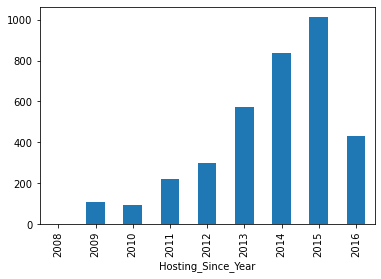

In [40]:
## Boston Listing Bar Garph

Boston_Listings.groupby('Hosting_Since_Year')['id'].count().plot(kind= 'bar')

#### There was a general upward trend of Airbnb's property listing in Boston till 2015. But in 2016 Airbnb's property listing was lower than 2015.
 

In [41]:
Seattle_Listings['host_since'].info()
Seattle_Listings['host_since'] = pd.to_datetime(Seattle_Listings['host_since'])
Seattle_Listings['Hosting_Since_Year'] = Seattle_Listings['host_since'].dt.year


<class 'pandas.core.series.Series'>
RangeIndex: 3818 entries, 0 to 3817
Series name: host_since
Non-Null Count  Dtype 
--------------  ----- 
3816 non-null   object
dtypes: object(1)
memory usage: 30.0+ KB


<AxesSubplot:xlabel='Hosting_Since_Year'>

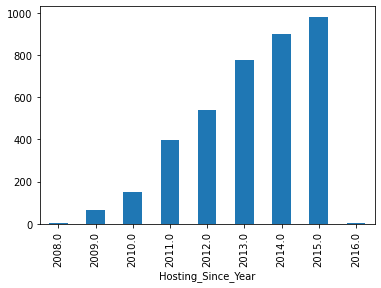

In [42]:
## Seattle Listing Bar Garph

Seattle_Listings.groupby('Hosting_Since_Year')['id'].count().plot(kind= 'bar')

#### Bars are going up every year. So, there is a general upward trend of Airbnb's property listing in Seattle.

### Q3 Is there a general upward trend of total Airbnb visitors to Boston and Seattle ?

Please note that in data, we don't have direct columns for vistors count. So i have used count of reviewers as an indirect way 
of getting the eastimate for visitors's trend for both Boston an Seattle

In [44]:
# Visitors Data For Boston

Boston_Reviews['date'] = pd.to_datetime(Boston_Reviews['date'])
print(Boston_Reviews['date'].info())
print('Min Review Date',Boston_Reviews['date'].min())
print('Max Review Date',Boston_Reviews['date'].max())



<class 'pandas.core.series.Series'>
RangeIndex: 68275 entries, 0 to 68274
Series name: date
Non-Null Count  Dtype         
--------------  -----         
68275 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 533.5 KB
None
Min Review Date 2009-03-21 00:00:00
Max Review Date 2016-09-06 00:00:00


In [45]:
Boston_Reviews['Year'] = Boston_Reviews['date'].dt.year
Boston_Reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,Year
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,2013
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,2013
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,2013
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,2013
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,2013
...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,2016
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,2016
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,2016
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,2016


<AxesSubplot:xlabel='Year'>

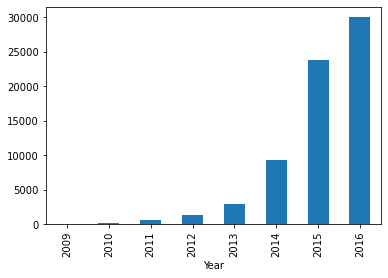

In [46]:
## Boston Visitors Bar Chart

Boston_Reviews.groupby(['Year'])['reviewer_id'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='Year'>

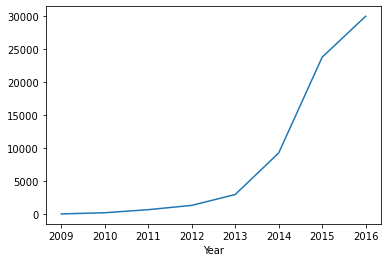

In [47]:
## Boston Visitors line Chart

Boston_Reviews.groupby(['Year'])['reviewer_id'].count().plot()

#### Bars are going up every year for Visitor's count in Boston. So, there is a general upward trend of Airbnb visitors to Boston.

In [48]:

# Visitors Data For Seattle

Seattle_Reviews['date'] = pd.to_datetime(Seattle_Reviews['date'])
print(Seattle_Reviews['date'].info())
print('Min Review Date',Seattle_Reviews['date'].min())
print('Max Review Date',Seattle_Reviews['date'].max())


<class 'pandas.core.series.Series'>
RangeIndex: 84849 entries, 0 to 84848
Series name: date
Non-Null Count  Dtype         
--------------  -----         
84849 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 663.0 KB
None
Min Review Date 2009-06-07 00:00:00
Max Review Date 2016-01-03 00:00:00


In [49]:
Seattle_Reviews['Year'] = Seattle_Reviews['date'].dt.year
Seattle_Reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,Year
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,2015
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,2015
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",2015
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,2015
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,2015
...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,2015
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,2015
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del...",2015
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",2015


<AxesSubplot:xlabel='Year'>

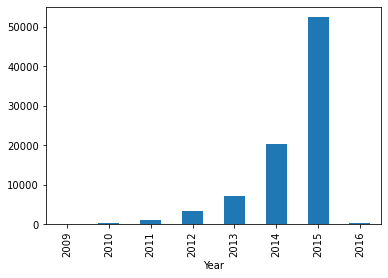

In [50]:
## Seattle Visitors Bar Chart

Seattle_Reviews.groupby(['Year'])['reviewer_id'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='Year'>

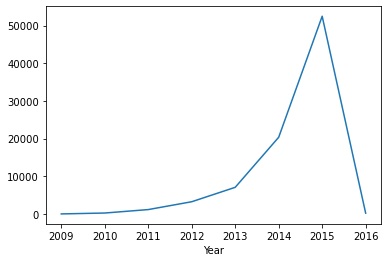

In [51]:
## Seattle Visitors line Chart

Seattle_Reviews.groupby(['Year'])['reviewer_id'].count().plot()

#### Bars are going up till year 2015 for Visitor's count in Seattle, but after that it fell drastically. So, there is no general uptrend of Airbnb visitors to Seattle.